In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv('../output_preprocessed/train_last_transaction.csv')
train = train[train.columns[1:]]
train_features = train[train.columns[1:]]
train_labels = train["is_churn"]
del train

In [3]:
train_features.head()

,trans_count,logs_count,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,2,0.0,18.0,36.0,2.0,9.0,20050406.0,0.0,0.0,0.0,...,0.0,0.0,20170121.0,4.0,0.0,2.0,5.0,76.0,74.0,19799.702
1,23,1.0,10.0,38.0,1.0,9.0,20050407.0,0.0,0.0,0.0,...,0.0,0.0,20170319.0,0.0,0.0,0.0,0.0,1.0,1.0,281.600
2,10,0.0,11.0,27.0,2.0,9.0,20051016.0,0.0,0.0,0.0,...,0.0,0.0,20161225.0,61.0,21.0,9.0,11.0,44.0,130.0,15845.692
3,3,5.0,13.0,23.0,2.0,9.0,20051102.0,40.0,30.0,149.0,...,20170426.0,0.0,20170331.0,28.0,4.0,5.0,4.0,19.0,51.0,6171.145
4,9,17.0,3.0,27.0,1.0,9.0,20051228.0,38.0,90.0,477.0,...,20170528.0,0.0,20170331.0,0.0,0.0,0.0,2.0,11.0,12.0,3132.042


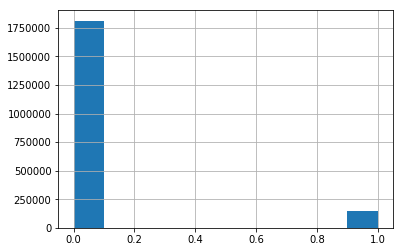

In [4]:
train_labels.hist()
plt.show()

In [5]:
pca = PCA(n_components=4)
pca.fit(train_features)
X_r = pca.transform(train_features)

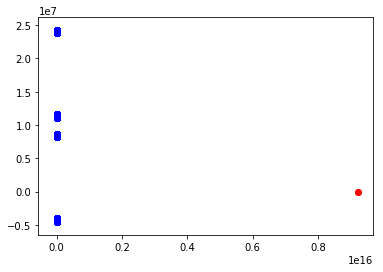

In [6]:
plt.scatter(X_r[train_labels == 0, 0], X_r[train_labels == 0, 1], color='red', alpha=.8, label="0")
plt.scatter(X_r[train_labels == 1, 0], X_r[train_labels == 1, 1], color='blue', alpha=.8, label="1")
plt.show()

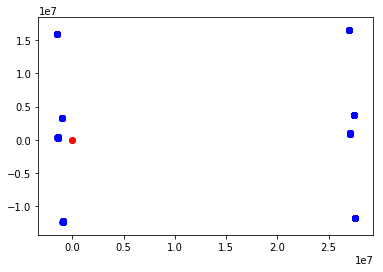

In [7]:
plt.scatter(X_r[train_labels == 0, 2], X_r[train_labels == 0, 3], color='red', alpha=.8, label="0")
plt.scatter(X_r[train_labels == 1, 2], X_r[train_labels == 1, 3], color='blue', alpha=.8, label="1")
plt.show()

In [8]:
def compute_logloss(pred_proba, ischurn):
    logloss = -((ischurn*np.log(pred_proba)).sum() + ((1 - ischurn)*np.log(1 - pred_proba)).sum())
    return (logloss / len(pred_proba))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=8)
n.fit(X_r[int(0.8*X_r.shape[0]):], train_labels[int(0.8*X_r.shape[0]):])
print(n.score(X_r[:int(0.8*X_r.shape[0])], train_labels[:int(0.8*X_r.shape[0])]))
print(compute_logloss(n.predict_proba(X_r[:int(0.8*X_r.shape[0])])[:,1].clip(0.+1e-15, 1-1e-15), train_labels[:int(0.8*X_r.shape[0])]))

0.957551084837
0.747706300901


In [ ]:
pred = pd.DataFrame()
pred["preds"] = n.predict_proba(X_r[:int(0.8*X_r.shape[0])])[:,1]
pred["preds"].hist()
plt.show()

In [ ]:
test = pd.read_csv('../output_preprocessed/test_last_transaction.csv')
test_features = test[test.columns[2:]]
test_r = pca.transform(test_features)

In [ ]:
predictions = pd.DataFrame()
predictions['msno']=test['msno']

n = KNeighborsClassifier(n_neighbors=10)
n.fit(X_r, train_labels)

predictions['is_churn']=(n.predict_proba(test_r)[:,1]).clip(0.+1e-15, 1-1e-15)
predictions.to_csv("../output/firstpred.csv", float_format='%.6f', index = False)

In [ ]:
params = {
'learning_rate' : 0.1,
 'n_estimators' : 1000,
 'max_depth' : 10,
 'min_child_weight': 12,
 'gamma' :10,
 'subsample':0.8,
 'colsample_bytree':0.8,
 'objective': 'binary:logistic',
 'nthread':4,
 'scale_pos_weight':1,
 'seed':27
    }
from xgboost import XGBClassifier
gbm = XGBClassifier(**params)
gbm.get_params()